# Linear Regression

Assume we have the following `linear model` to make the prediction:

$$ f_{w,b}(x^{(i)}) = w\cdot x^{(i)} + b \tag{1} \ , $$



where $x^{(i)}$ is the feature value for the $i$-th training example and $w,b$ are the weight and bias parameters. For linear regession the there is only one single feature as an input.

The `cost function` $J(w,b)$ is a measurement which describes how good the `predicted values` $f_{w,b}(x^{(i)})$ matches to the `target values` $y^{(i)}$ of the training set. In general to get a good fit of predicted to target values the cost function needs be minimzed.

$$ J(w,b) = \frac{1}{2m} \sum_i^m (f_{w,b}(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \sum_i^m (w\cdot x^{(i)} + b - y^{(i)})^2 \tag{2} \ .$$

In order to get the "optimal" values for $w$ and $b$ the `gradient descent method` will be applied to find a *`local`* or *`global minima`* of the cost function.

$$w = w - \alpha \cdot \frac{\partial}{\partial w} J(w,b) \tag{3} \ ,$$

$$b = b - \alpha \cdot \frac{\partial}{\partial w} J(w,b) \tag{4} \ ,$$

where $\alpha$ is the `learning rate value`. Chosing a very small value of $\alpha$ will lead to the local or global minima, but it will take large number of iteration to converge. A large value of $\alpha$ may lead to an overestimated value for the cost function $J$. After a certain iteration the soltion might diverge and the local or global minima cannot be found.

Evaluating the the `partial derivatives` of the cost function will give the following for $w$ and $b$:

$$w = w - \alpha \cdot \frac{1}{m} \sum_i^m (w\cdot x^{(i)} + b - y^{(i)}) x^{(i)} \tag{5} \ , $$

$$b = b - \alpha \cdot \frac{1}{m} \sum_i^m (w\cdot x^{(i)} + b - y^{(i)}) \tag{6} \ . $$

## Example Problem

| Size (sqft) | Price (1000s dollars)  |   
| ----------------|-------------- |  
| 2104            | 460           |  
| 1416            | 232           |  
| 852             | 178           |  

In this example the price of the house depends only on on the **single feature** *size* . The number of given **traning examples** are **3**.

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import numpy.typing as npt

get_ipython().run_line_magic('matplotlib', 'notebook')

## Tranining data

In [163]:
x_train = np.array([2014., 1416., 852.])
y_train = np.array([460, 232, 178])

## Define Cost-Function

In [164]:
def compute_cost(x,y,w,b):

    m = x.shape[0] # number of training examples
    
    sum_cost = 0
    
    for i in range(m):
        fwb = w * x[i] + b
        sum_i = (fwb - y[i])**2
        sum_cost = sum_cost + sum_i

    cost_value = sum_cost/(2*m)
    
    return cost_value

## Define Function for Gradient Caluclation

In [165]:
def compute_gradient(x,y,w,b):
    
    m = x.shape[0] # number of training examples
    
    sum_dw = 0
    sum_db = 0
    
    for i in range(m):
        fwb = w * x[i] + b
        
        # gradient for w
        sum_dw_i = (fwb - y[i])*x[i]
        sum_dw = sum_dw + sum_dw_i
        
        # gradient for y
        sum_db_i = (fwb - y[i])
        sum_db = sum_db + sum_db_i
        
    dj_dw = sum_dw/m    
    dj_db = sum_db/m
    
    return dj_dw, dj_db

## Define Gradient Descent Function for Optimizating the Parameter

In [166]:
def gradient_descent(x,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter):
    
    w = w_init
    b = b_init
    J_history = []
    w_history = []
    b_history = []
    
    for i in range(num_iter):
        # compute cost value
        J_history.append(compute_cost(x,y,w,b))
        
        # compute gradient
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        
        # update parameter w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        w_history.append(w)
        b_history.append(b)
        
    return w, b, J_history, w_history, b_history

## Run Gradient Descent Algorithm

In [171]:
x = x_train
y = y_train
w_init = -300.
b_init = 30.
alpha = 1e-8
cost_function = compute_cost
gradient_function = compute_gradient
num_iter = 50000

w,b,J_history,w_history, b_history = gradient_descent(x,y,w_init,b_init,alpha,cost_function,gradient_function,num_iter)

## Optimized Parameter Value Pair

In [172]:
w_opt, b_opt = w_history[-1], b_history[-1]
print(f'Optimized value for w,b : {w_opt, b_opt}')

Optimized value for w,b : (0.18820193474081665, 30.184981955646812)


## Visualize Cost-Function

<IPython.core.display.Javascript object>


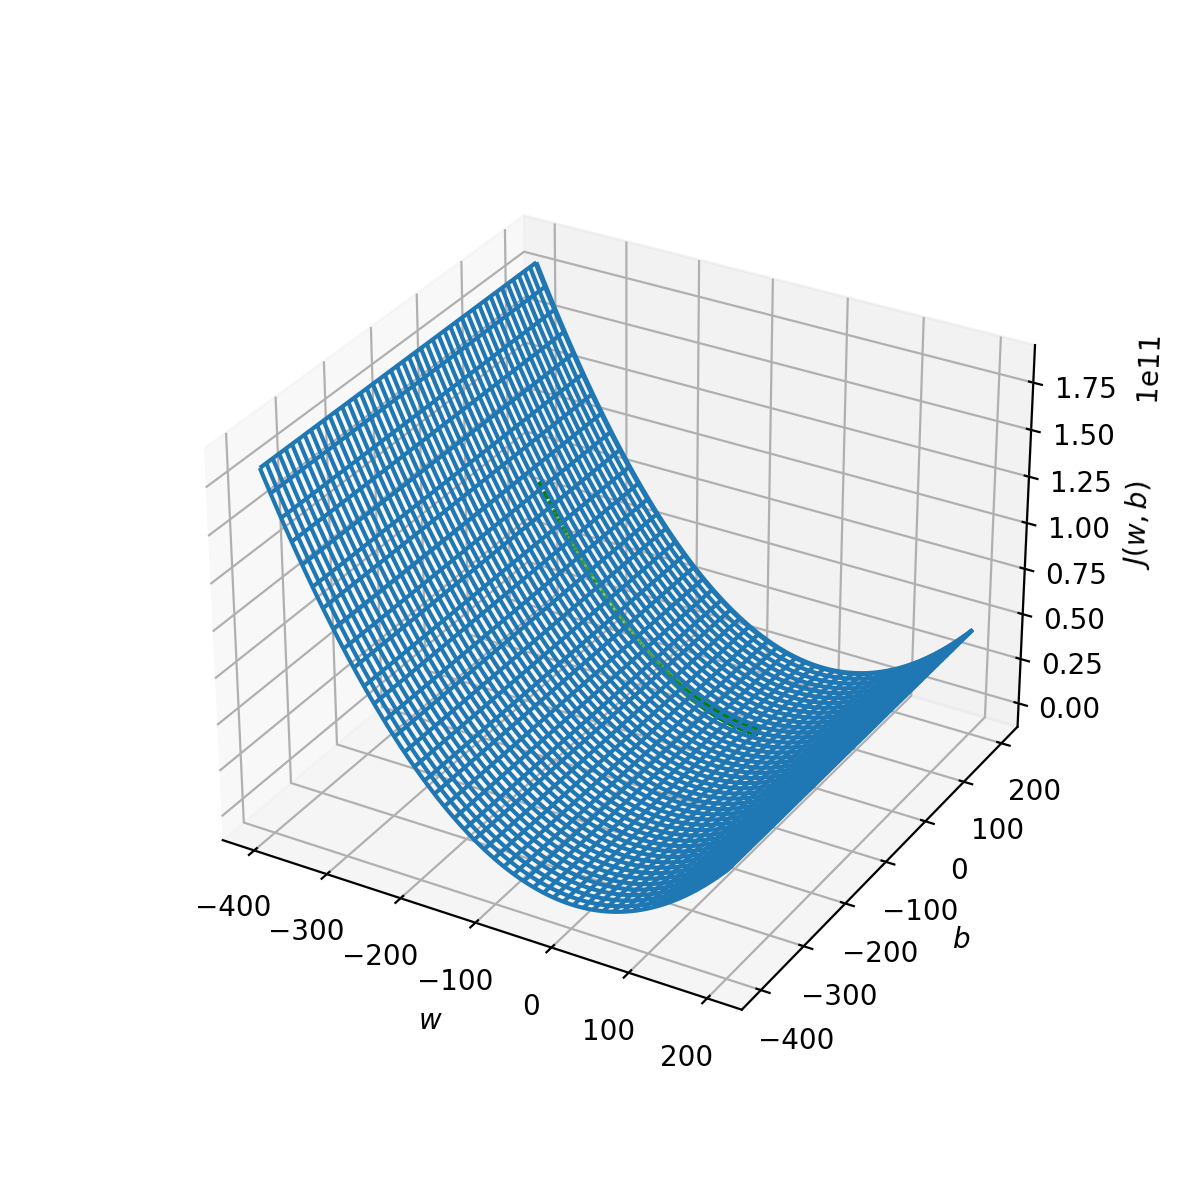

In [174]:
w1 = np.arange(-400,201)
b1 = np.arange(-400,201)

w1,b1 = np.meshgrid(w1,b1)

cost_value1 = compute_cost(x_train,y_train,w1,b1)

plt.figure(figsize=(6,6))
ax = plt.axes(projection ='3d')

#ax.plot_surface(w1,b1, cost_value1, cmap ='coolwarm')
ax.plot_wireframe(w1,b1, cost_value1, cmap ='coolwarm')

ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
ax.set_zlabel('$J(w,b)$')

ax.scatter(w_history, b_history, J_history, marker='o', c="green", s=5)

plt.show()